<a href="https://colab.research.google.com/github/Hhyoy/Flutter/blob/master/Lect4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:

data = pd.read_csv("weather.csv")
print(data.head())

   country      date  precipitation  snow_depth       tavg      tmax  \
0  Finland  1/1/2015       1.714141  284.545455   1.428571  2.912739   
1  Finland  1/2/2015      10.016667  195.000000   0.553571  2.358599   
2  Finland  1/3/2015       3.956061  284.294118  -1.739286  0.820382   
3  Finland  1/4/2015       0.246193  260.772727  -7.035714 -3.110828   
4  Finland  1/5/2015       0.036364  236.900000 -17.164286 -8.727564   

        tmin  
0  -1.015287  
1  -0.998718  
2  -3.463871  
3  -9.502581  
4 -19.004487  


In [ ]:
print(data.describe())

       precipitation   snow_depth         tavg         tmax         tmin
count    5478.000000  5478.000000  5478.000000  5478.000000  5478.000000
mean        2.373517   127.252197     4.844088     8.415625     0.977423
std         2.794442   165.753504     7.802099     8.523315     7.597392
min         0.000000    -0.168539   -27.951852   -24.197403   -29.639610
25%         0.379808     0.000000    -0.810714     1.718725    -4.079661
50%         1.384036    33.234612     4.282143     7.584506     0.965888
75%         3.410252   215.604972    11.554825    15.883971     7.450520
max        21.947368   682.909091    24.407143    30.561438    17.992891


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        5478 non-null   object 
 1   date           5478 non-null   object 
 2   precipitation  5478 non-null   float64
 3   snow_depth     5478 non-null   float64
 4   tavg           5478 non-null   float64
 5   tmax           5478 non-null   float64
 6   tmin           5478 non-null   float64
dtypes: float64(5), object(2)
memory usage: 299.7+ KB
None


In [ ]:
figure = px.line(data, x="date",  y="precipitation",  title='Mean precipitation in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="date", y="snow_depth", title='snow_depth in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="date", y="tavg", title='tavg in Delhi Over the Years')
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="precipitation", y="snow_depth", size="tavg",trendline="ols",
title = "Relationship Between precipitation and snow_depth")
figure.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scattergl.marker
        Invalid elements include: [-1.739285714, -7.035714286, -17.16428571, -17.47142857, -4.453571429, -1.760714286, -3.285714286, -9.457142857, -16.14642857, -19.425]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [ ]:
data["date"] = pd.to_datetime(data["date"], format ='%y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

ValueError: time data "1/1/2015" doesn't match format "%y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
figure = px.scatter(data_frame = data, x="precipitation", y="snow_depth", size="tavg", trendline="ols", # Changed 'size' to an existing column 'tavg'
title = "Relationship Between precipitation and snow_depth")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="precipitation", y="snow_depth", size="tavg", trendline="ols", # Changed 'size' to an existing column 'tavg'
title = "Relationship Between precipitation and snow_depth")
figure.show()

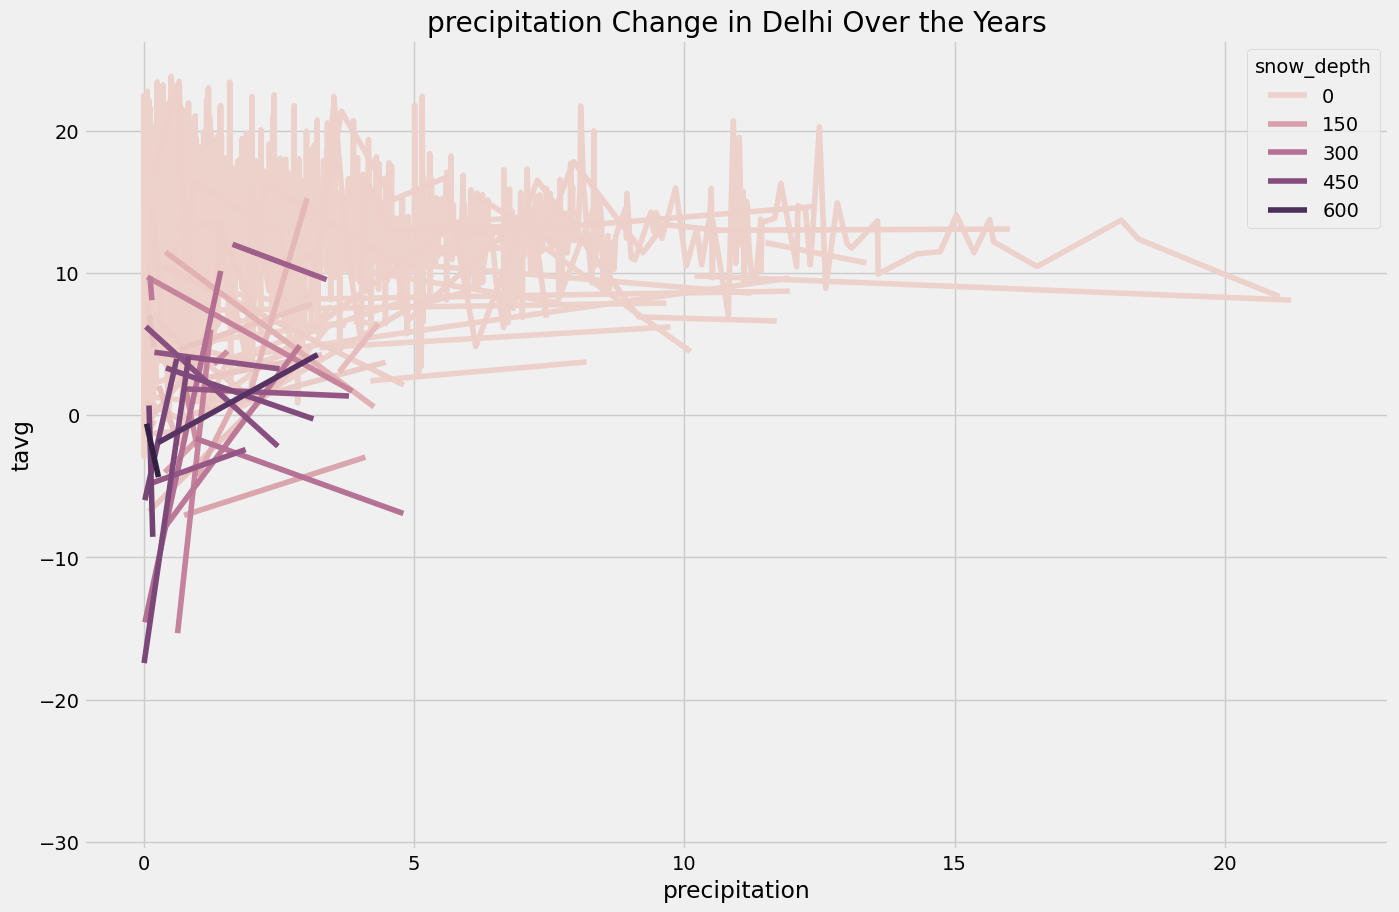

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("precipitation Change in Delhi Over the Years")
sns.lineplot(data = data, x='precipitation', y='tavg', hue='snow_depth')
plt.show()

In [ ]:
forecast_data = data.rename(columns = {"date": "ds", "tavg": "y"})
print(forecast_data)

      country          ds  precipitation  snow_depth          y      tmax  \
0     Finland    1/1/2015       1.714141  284.545455   1.428571  2.912739   
1     Finland    1/2/2015      10.016667  195.000000   0.553571  2.358599   
2     Finland    1/3/2015       3.956061  284.294118  -1.739286  0.820382   
3     Finland    1/4/2015       0.246193  260.772727  -7.035714 -3.110828   
4     Finland    1/5/2015       0.036364  236.900000 -17.164286 -8.727564   
...       ...         ...            ...         ...        ...       ...   
5473   Sweden  12/27/2019       0.105079  141.220930  -4.277778 -2.391204   
5474   Sweden  12/28/2019       1.117688  142.955224  -3.866667 -3.006542   
5475   Sweden  12/29/2019       1.758669  136.725146   1.755556  3.692056   
5476   Sweden  12/30/2019       0.561996  120.740741   4.900000  6.135648   
5477   Sweden  12/31/2019       0.848161  131.583333   1.722222  4.376606   

           tmin  
0     -1.015287  
1     -0.998718  
2     -3.463871  
3  

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import numpy

In [ ]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=1095)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a46t4w7/bg9agd_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a46t4w7/ecdn8yeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22511', 'data', 'file=/tmp/tmp6a46t4w7/bg9agd_h.json', 'init=/tmp/tmp6a46t4w7/ecdn8yeb.json', 'output', 'file=/tmp/tmp6a46t4w7/prophet_modelevlp3r7x/prophet_model-20240817001502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime 